In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
print(tf.__version__)

2.2.0


In [5]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissor.zip

--2020-05-12 17:11:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissor.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.6MB/s    in 31s     

2020-05-12 17:11:36 (9.90 MB/s) - ‘/tmp/rockpaperscissor.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

paper_imgs = os.listdir(paper_dir)
rock_imgs = os.listdir(rock_dir)
scissors_imgs = os.listdir(scissors_dir)

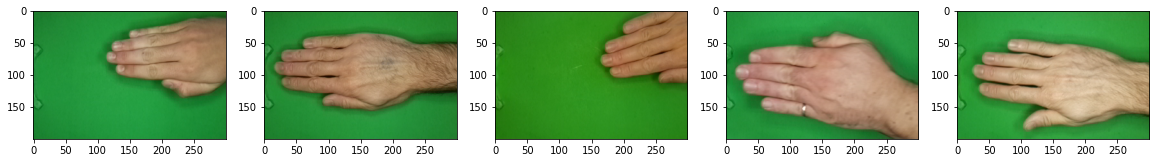

In [14]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(paper_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(paper_dir, img_path))
    plt.imshow(img)
plt.show()

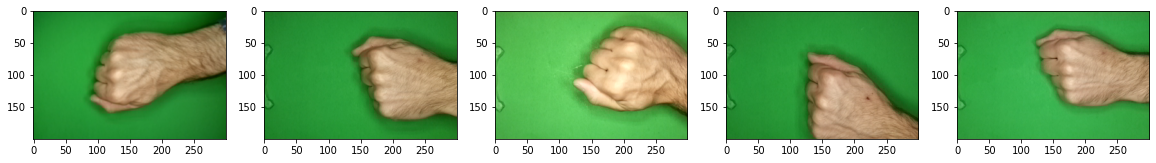

In [15]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(rock_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(rock_dir, img_path))
    plt.imshow(img)
plt.show()

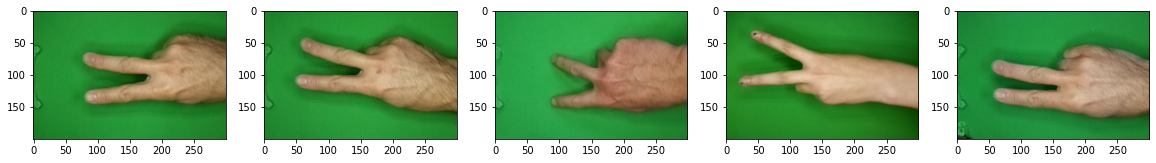

In [16]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(scissors_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(scissors_dir, img_path))
    plt.imshow(img)
plt.show()

In [17]:
data_dir = '/tmp/rockpaperscissors/rps-cv-images/'
augs_gen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2
)  

train_gen = augs_gen.flow_from_directory(
    data_dir,
    target_size = (224,224),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
    subset='training'
)

val_gen = augs_gen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0

In [20]:
model.fit(
      train_gen,
      steps_per_epoch=50, 
      epochs=8,
      validation_data=val_gen,
      validation_steps=50, 
      verbose=1)

Epoch 1/8
50/50 [==============================] - 36s 715ms/step - loss: 0.9953 - acc: 0.5125 - val_loss: 0.7672 - val_acc: 0.7160
Epoch 2/8
50/50 [==============================] - 35s 706ms/step - loss: 0.6436 - acc: 0.7649 - val_loss: 0.5091 - val_acc: 0.8329
Epoch 3/8
50/50 [==============================] - 36s 711ms/step - loss: 0.4064 - acc: 0.8542 - val_loss: 0.3459 - val_acc: 0.8877
Epoch 4/8
50/50 [==============================] - 36s 716ms/step - loss: 0.2813 - acc: 0.9057 - val_loss: 0.2978 - val_acc: 0.8965
Epoch 5/8
50/50 [==============================] - 36s 712ms/step - loss: 0.2345 - acc: 0.9283 - val_loss: 0.2221 - val_acc: 0.9267
Epoch 6/8
50/50 [==============================] - 36s 710ms/step - loss: 0.2202 - acc: 0.9239 - val_loss: 0.2145 - val_acc: 0.9215
Epoch 7/8
50/50 [==============================] - 35s 701ms/step - loss: 0.1571 - acc: 0.9485 - val_loss: 0.1935 - val_acc: 0.9351
Epoch 8/8
50/50 [==============================] - 35s 701ms/step - loss: 0.

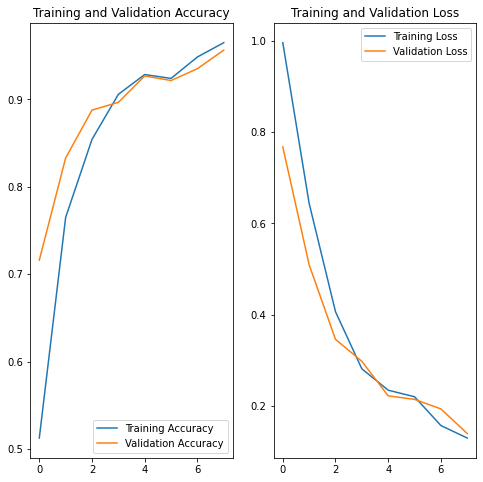

In [21]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Using TensorFlow backend.


Saving 1VRzspyXpQ6A2rKy.png to 1VRzspyXpQ6A2rKy.png
1VRzspyXpQ6A2rKy.png
[[0.0, 0.0, 1.0]]
scissors


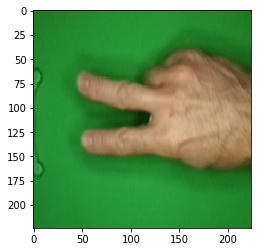

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
 
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = img
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  a = classes.tolist()
  
  print(fn) 
  print(a)
  if (a == [[1.0,0.0,0.0]]):
    print('paper')
  elif (a == [[0.0,1.0,0.0]]):
    print('rock')  
  elif (a == [[0.0,0.0,1.0]]):
    print('scissors')
    